In [126]:
from models.Unet import BasicUnet
from models.DualAttentionUnet import DualAttentionUnet
from training_testing.dataloader import DataLoaderNoisyClean, dataset, transformStruct
import torch
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [127]:
#Import the testing data split (using same split from configs)
def dataLoaderforVis(noiseParamstd:float):
    generator = torch.Generator().manual_seed(20) #same seed
    processedDataSet = DataLoaderNoisyClean(dataset, transform=transformStruct, noiseParam=(0.0, noiseParamstd, True))

    # Split dataset using the set split in configs
    train_dataset, validate_dataset, test_dataset = torch.utils.data.random_split(
        processedDataSet, 
        [0.7, 0.15, 0.15],  
        generator=generator
    )

    train_dataloader = DataLoader(
        train_dataset, 
        batch_size=64, 
        shuffle=True,
        pin_memory=True, 
        num_workers=6
    )

    validation_dataloader = DataLoader(
        validate_dataset, 
        batch_size=64, 
        shuffle=False,
        pin_memory=True, 
        num_workers=6
    )

    test_dataloader = DataLoader(
        test_dataset, 
        batch_size=64, 
        shuffle=False,
        pin_memory=True, 
        num_workers=6
    )
    print(processedDataSet.noiseStructure)
    trainIter = iter(train_dataloader)
    noisyBatch, cleanBatch = next(trainIter)


    noisyImg1, cleanImg1 = noisyBatch[0], cleanBatch[0]
    noisyImg2, cleanImg2 = noisyBatch[10], cleanBatch[10]
    return noisyImg1, cleanImg1, noisyImg2, cleanImg2

In [128]:
#run two models and save their image output as a function 
def runModelsSaveOutput(unetModelPath,attentionUnetModelPath,noisyImg1,noisyImg2,sumOrElement:bool):
    device = 'cuda' if torch.cuda.is_available() else 'cpu'

    #Loading in Unet
    unet = BasicUnet(in_channels=1, out_channels=1)
    unet.load_state_dict(torch.load(unetModelPath, map_location=device))
    unet.to(device)
    unet.eval()
    
    #Loading in attentionUnet
    attentionUnet = DualAttentionUnet(in_channels=1, out_channels=1, sumOrElement=sumOrElement)  
    attentionUnet.load_state_dict(torch.load(attentionUnetModelPath, map_location=device))
    attentionUnet.to(device)
    attentionUnet.eval()
    
    input_tensor1 = noisyImg1.unsqueeze(0).to(device) #adding batch dims so its 1, 1, 255,255
    input_tensor2 = noisyImg2.unsqueeze(0).to(device) 
    
    with torch.no_grad():
        outputUnetImg1 = unet(input_tensor1).cpu()
        outputUnetImg2 = unet(input_tensor2).cpu()
        
        outputAttentionUnetImg1 = attentionUnet(input_tensor1).cpu()
        outputAttentionUnetImg2 = attentionUnet(input_tensor2).cpu()
    
    
    return  outputUnetImg1, outputUnetImg2, outputAttentionUnetImg1, outputAttentionUnetImg2
    


In [129]:
def showImages(noisy_img, clean_img, basicUnet_img, attentionUnet_img, index=1):
    noisy = noisy_img.detach().cpu().squeeze().numpy()
    clean = clean_img.detach().cpu().squeeze().numpy()
    basic = basicUnet_img.detach().cpu().squeeze().numpy()
    attention = attentionUnet_img.detach().cpu().squeeze().numpy()

    fig, axs = plt.subplots(1, 4, figsize=(12, 3))  

    axs[0].imshow(noisy, cmap='gray')
    axs[0].set_title(f"Noisy Image {index}")
    axs[0].axis('off')

    axs[1].imshow(clean, cmap='gray')
    axs[1].set_title(f"Clean Image {index}")
    axs[1].axis('off')

    axs[2].imshow(basic, cmap='gray')
    axs[2].set_title(f"BasicUnet Output {index}")
    axs[2].axis('off')

    axs[3].imshow(attention, cmap='gray')
    axs[3].set_title(f"AttentionUnet Output {index}")
    axs[3].axis('off')

    plt.tight_layout()
    plt.show()

In [130]:
#Below is 0.05
noisyImg1, cleanImg1, noisyImg2, cleanImg2=dataLoaderforVis(0.05)
print(noisyImg1.shape)

GaussianNoise(mean=0.0, sigma=0.05, clip=True)
torch.Size([1, 256, 256])


In [131]:
unetModelPath = "/blue/uf-dsi/normansmith/projects/TVAttention-Autoencoder/models/best_models/unetFinal_gaussian_0.05.pth"
attentionUnetModelPath = "/blue/uf-dsi/normansmith/projects/TVAttention-Autoencoder/models/best_models/unetFinal_Attention_gaussian_0.05.pth"
outputUnetImg1, outputUnetImg2, outputAttentionUnetImg1, outputAttentionUnetImg2 = runModelsSaveOutput(
    unetModelPath,
    attentionUnetModelPath,
    noisyImg1,
    noisyImg2,
    False
)


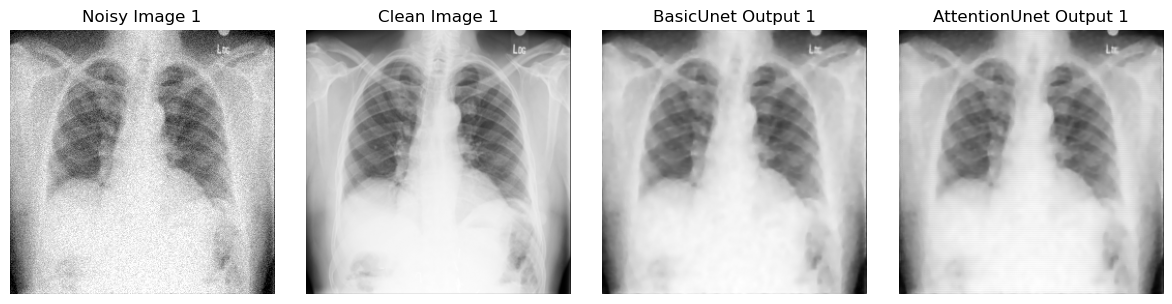

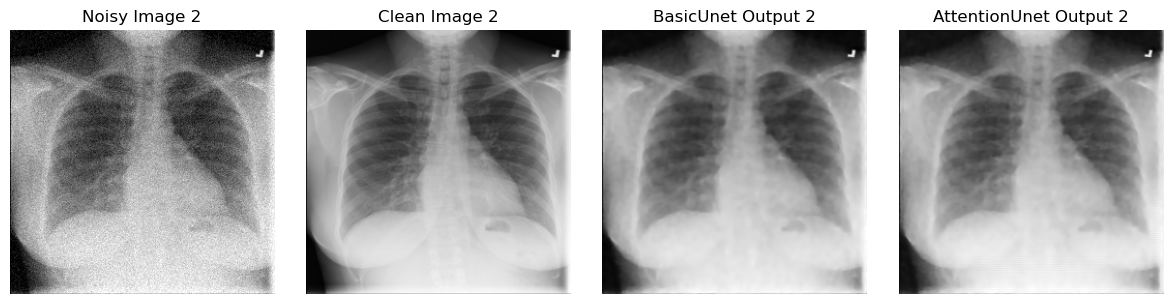

In [132]:
showImages(noisyImg1, cleanImg1, outputUnetImg1, outputAttentionUnetImg1, idx=1)
showImages(noisyImg2, cleanImg2, outputUnetImg2, outputAttentionUnetImg2, idx=2)

In [133]:
#Below is 0.1
noisyImg1, cleanImg1, noisyImg2, cleanImg2=dataLoaderforVis(0.1)
print(noisyImg1.shape)

GaussianNoise(mean=0.0, sigma=0.1, clip=True)
torch.Size([1, 256, 256])


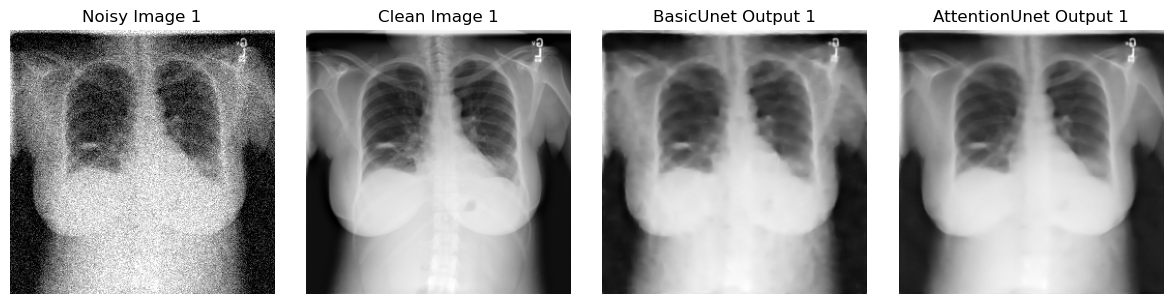

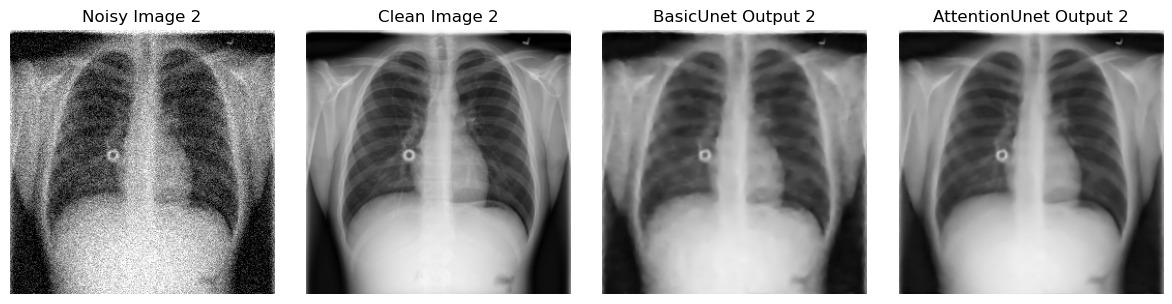

In [134]:
unetModelPath = "/blue/uf-dsi/normansmith/projects/TVAttention-Autoencoder/models/best_models/unetFinal_gaussian_0.1.pth"
attentionUnetModelPath = "/blue/uf-dsi/normansmith/projects/TVAttention-Autoencoder/models/best_models/unetFinal_Attention_gaussian_0.1.pth"
outputUnetImg1, outputUnetImg2, outputAttentionUnetImg1, outputAttentionUnetImg2 = runModelsSaveOutput(
    unetModelPath,
    attentionUnetModelPath,
    noisyImg1,
    noisyImg2,
    True
)
showImages(noisyImg1, cleanImg1, outputUnetImg1, outputAttentionUnetImg1, idx=1)
showImages(noisyImg2, cleanImg2, outputUnetImg2, outputAttentionUnetImg2, idx=2)

In [135]:
#Below is 0.15
noisyImg1, cleanImg1, noisyImg2, cleanImg2=dataLoaderforVis(0.15)
print(noisyImg1.shape)

GaussianNoise(mean=0.0, sigma=0.15, clip=True)
torch.Size([1, 256, 256])


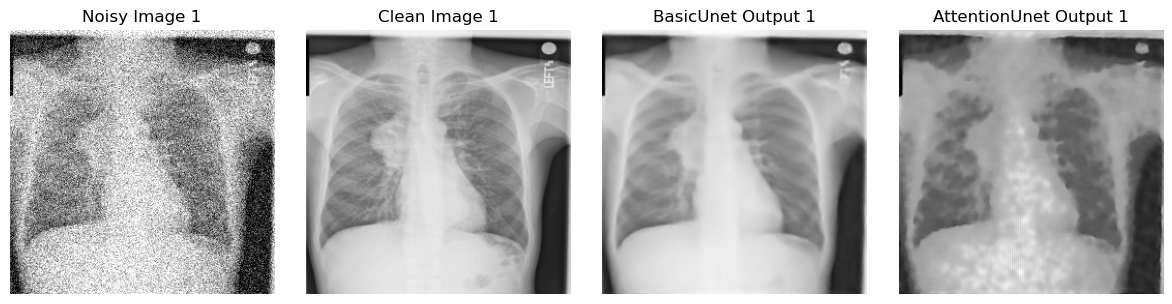

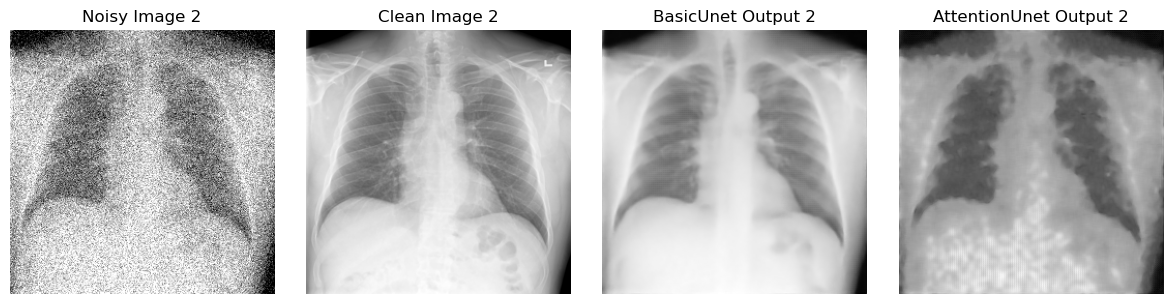

In [136]:
unetModelPath = "/blue/uf-dsi/normansmith/projects/TVAttention-Autoencoder/models/best_models/unetFinal_gaussian_0.15.pth"
attentionUnetModelPath = "/blue/uf-dsi/normansmith/projects/TVAttention-Autoencoder/models/best_models/unetFinal_Attention_gaussian_0.15.pth"
outputUnetImg1, outputUnetImg2, outputAttentionUnetImg1, outputAttentionUnetImg2 = runModelsSaveOutput(
    unetModelPath,
    attentionUnetModelPath,
    noisyImg1,
    noisyImg2,
    True
)
showImages(noisyImg1, cleanImg1, outputUnetImg1, outputAttentionUnetImg1, idx=1)
showImages(noisyImg2, cleanImg2, outputUnetImg2, outputAttentionUnetImg2, idx=2)